# CSE_440_ Final_Project
# Sec: 02
# Group number: 7
## Name: Md Reyad Hossain       ID: 1721966642
## Name: Ridwanul Haque            ID: 1721144042

# Getting Started: The Dataset (15): 
## Import necessary files
1.   Import necessary files
2.   upload the dataset
3.   covert the dataset to a dataframe
4.   make a copy of your dataframe, and work on that copy.

                hint: df_copied = df.copy(deep=True)

In [ ]:
#import all neccesary file
import numpy as np
import pandas as pd 
import seaborn as sns
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df = pd.read_csv("healthcare-dataset-stroke-data.csv") # Convert dataset to Data Frame also upload the dataset.
df_copied = df.copy(deep=True) # make a copy of my dataframe "df"
df_copied  # Showing my data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Part 1: Getting to know your data


## Feature selection (10): 


1.   List all the columns, do you think all of the columns are necessary? 
2.   Remove any unnecessary columns if any. (for example: in the heart desease UCI dataset, all columns are usefull)



In [ ]:
df_copied.columns # List all the columns of my dataset

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Comment:
### Here we are showing list of columns in my dataset

In [ ]:
df_copied.drop('id', inplace=True, axis=1) # Remove unnecessary columns

# Comment
### We are dropping ID column here as in analysis, it has no impact, that's why we can drop this column
## ref link: https://www.educative.io/edpresso/how-to-delete-a-column-in-pandas

In [ ]:
df_copied

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Comment:
### Dataset, after Dropping id column 

## Cleaning the data (15)


1.   Check for missing values in your data
2.   Based on the missing data, drop if:

      *   there is any column with all Nans
      *   any rows with all Nans

3.   Now, use a mathod to handle rest of the missing values. Also, please justify why you adopted any particular method.
(ref: https://www.kaggle.com/alexisbcook/handling-missing-values)
4.   If the target column has any other values other than numeric 0 and 1, convert it to numeric values. 










In [ ]:
#missing_value=["N/a","na", np.nan]
#df_m_value = pd.read_csv("healthcare-dataset-stroke-data.csv", na_values=missing_value)
#df_m_value.isnull().sum()
df_copied.isnull().sum() # checking, missing value in my dataset and calculating sum of the missing value

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Comment:
### After calculating here we get 201 missing for only "bmi" column

In [ ]:
df_copied.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
#df_m_value.isnull().any()
df_dropped= df_copied.interpolate() # handling missing value( drop the all missing  value and adopted in interpolate method)

df_dropped.isnull().sum() #After dropping missing shoing we don't have any mising value
#df_dropped.describe()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Comment:
### we have used interpolate method, which makes mean value counting from its previous and the next value  for all the missing values as mean value impacts more in accuracy calculation than numeric values.we also could take 0 or 1 for missing values but 0 or 1 makes near no impact on calculation.

In [ ]:
df_dropped.describe() #describing the dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.00000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.92728,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.77531,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.60000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [ ]:
#, convert  numeric values 0,1 where  we get any other value
df_dropped.gender[df_dropped.gender=="Male"]=0
df_dropped.gender[df_dropped.gender=="Female"]=1
df_dropped.gender[df_dropped.gender=="Other"]=2
df_dropped.ever_married[df_dropped.ever_married=="Yes"]=0
df_dropped.ever_married[df_dropped.ever_married=="No"]=1
df_dropped.work_type[df_dropped.work_type=='Private']=0
df_dropped.work_type[df_dropped.work_type=='Self-employed']=1 
df_dropped.work_type[df_dropped.work_type=='Govt_job']=2
df_dropped.work_type[df_dropped.work_type=='Never_worked']=3 
df_dropped.work_type[df_dropped.work_type=='children']=3
df_dropped.Residence_type[df_dropped.Residence_type=='Urban']=0
df_dropped.Residence_type[df_dropped.Residence_type=='Rural']=1
df_dropped.smoking_status[df_dropped.smoking_status=='formerly smoked']=0
df_dropped.smoking_status[df_dropped.smoking_status=='never smoked']=1
df_dropped.smoking_status[df_dropped.smoking_status=='smokes']=2
df_dropped.smoking_status[df_dropped.smoking_status=='Unknown']=3
df_dropped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.60,0,1
1,1,61.0,0,0,0,1,1,202.21,34.55,1,1
2,0,80.0,0,1,0,0,1,105.92,32.50,1,1
3,1,49.0,0,0,0,0,0,171.23,34.40,2,1
4,1,79.0,1,0,0,1,1,174.12,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,0,83.75,29.30,1,0
5106,1,81.0,0,0,0,1,0,125.20,40.00,1,0
5107,1,35.0,0,0,0,1,1,82.99,30.60,1,0
5108,0,51.0,0,0,0,0,1,166.29,25.60,0,0


# Comment: 
### After converting numaric value then my dataset look like this.

## Preliminery data exploration (15)
1.   Take some of your columns to compare/explore 
for example: 
          *   plot heart attack based on age
          *   plot heart attack based on sex (these are just exaples, you can compare other factors like blood suger etc.)
          (ref: https://www.kaggle.com/venugopalkadamba/heart-attack-eda-visualizations-prediction)
          * plot stroke based on gender
          * plot stroke based on age
          (ref: https://www.kaggle.com/shivayunamdev/data-visualisation-and-eda?scriptVersionId=63062210&cellId=10)
          * compare temperature with raintoday/tomorrow
          * compare pressure with raintoday/tomorrow
          (ref: https://www.kaggle.com/wwwarpit/eda-and-modelling?scriptVersionId=63026388&cellId=53)



In [ ]:
def numeric_eda(df_dropped, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df_dropped.describe().T)
    columns = df_dropped.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df_dropped, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df_dropped.select_dtypes(include='category').columns) > 0:
        for col_num in df_dropped.select_dtypes(include=np.number).columns:
            for col in df_dropped.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df_dropped.select_dtypes(include=np.number))
    else:
        sns.pairplot(df_dropped.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df_dropped.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df_dropped[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df_dropped, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df_dropped.select_dtypes(include=['object', 'category']).nunique())
    top5(df_dropped)
    # Plot count distribution of categorical data
    for col in df_dropped.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df_dropped, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df_dropped) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df_dropped = df_dropped.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df_dropped.info())

    # generate preview of entries with null values
    if df_dropped.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df_dropped[df_dropped.isnull().any(axis=1)].head(3))
        missingno.matrix(df_dropped)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df_dropped[df_dropped.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df_dropped[df_dropped.duplicated()]))
        display(df_dropped[df_dropped.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

## Ref link: https://www.wordclouds.com/

In [ ]:
categorical_eda(df_dropped) # catagorical eda 


To check: 
Unique count of non-numeric data

gender            3
ever_married      2
work_type         4
Residence_type    2
smoking_status    4
dtype: int64
Top 5 unique values of gender
   gender  Count
0       1   2994
1       0   2115
2       2      1
 
Top 5 unique values of ever_married
   ever_married  Count
0             0   3353
1             1   1757
 
Top 5 unique values of work_type
   work_type  Count
0          0   2925
1          1    819
2          3    709
3          2    657
 
Top 5 unique values of Residence_type
   Residence_type  Count
0               0   2596
1               1   2514
 
Top 5 unique values of smoking_status
   smoking_status  Count
0               1   1892
1               3   1544
2               0    885
3               2    789
 


## Comment: here frist evalution data analysis on my data set then describe the top five uniqu value on my dataset.

Stroke: 4%
No Stroke: 96%



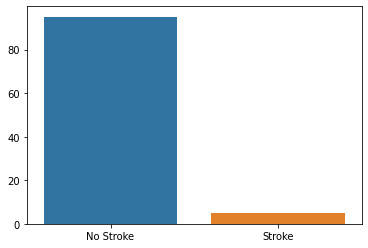

In [ ]:
val_counts = df_dropped["stroke"].value_counts()
no_Stroke = (val_counts[0] / df_dropped.shape[0]) * 100
Stroke = (val_counts[1] / df_dropped.shape[0]) * 100

print(f"Stroke: {math.floor(Stroke)}%")
print(f"No Stroke: {math.ceil(no_Stroke)}%")

print()

sns.barplot(x = ["No Stroke", "Stroke"], y = [no_Stroke, Stroke])
plt.show()

# Comment:
### After EDA here we showing the percetage of stroke and nonstroke and and plot it 
##  [Ref Link:](https://www.kaggle.com/venugopalkadamba/heart-attack-eda-visualizations-prediction)

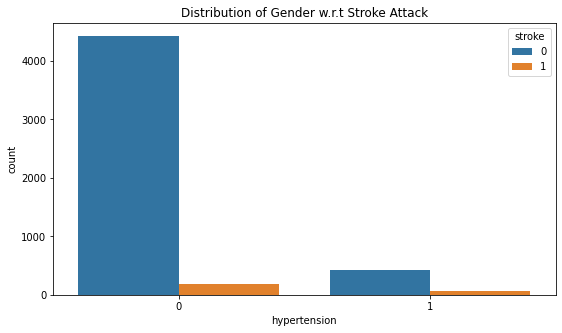

In [ ]:
ax = plt.figure(figsize = (9,5))
sns.countplot(
    data=df_dropped,
    x = "hypertension",
    hue="stroke",
)
plt.title("Distribution of Gender w.r.t Stroke Attack")
plt.show()

# Comment:
### Here we are ploting stroke data based on hypertension

In [ ]:
val_counts = df_dropped.groupby("hypertension")["stroke"].value_counts()
nohypertension = (val_counts[1][1] /(val_counts[1][1]+val_counts[1][0]))* 100
hypertension= (val_counts[0][1] / (val_counts[0][1]+val_counts[0][0])) * 100

print(f"Hypertention: {hypertension}%")
print(f"No Hypertention: {nohypertension}%")

Hypertention: 3.967909800520382%
No Hypertention: 13.253012048192772%


## Comment: Stroke percentage based on hypertension 

In [ ]:
val_counts = df_dropped.groupby("gender")["stroke"].value_counts()
male_Stroke = (val_counts[1][1] / (val_counts[1][1]+val_counts[1][0])) * 100
female_Stroke = (val_counts[0][1] / (val_counts[0][1]+val_counts[0][0])) * 100

print(f"Male stroke: {male_Stroke}%")
print(f"Female Stoke: {female_Stroke}%")

Male stroke: 4.709418837675351%
Female Stoke: 5.106382978723404%


## Comment:Here we are predicting male and female stroke percentage among all the dates.

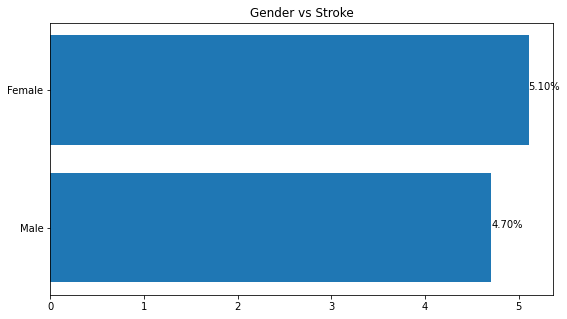

In [ ]:
plt.figure(figsize = (9,5))
x = ["Male","Female"]
y = [male_Stroke,female_Stroke]
plt.barh(x, y)
  
for index, value in enumerate(y):
    plt.text(value, index,
             str(value)[:4]+"%")

plt.title("Gender vs Stroke")
plt.show()

Comment:Here we are ploting male and female stroke percentage among all the dates.

Ref Link: https://www.kaggle.com/venugopalkadamba/heart-attack-eda-visualizations-prediction

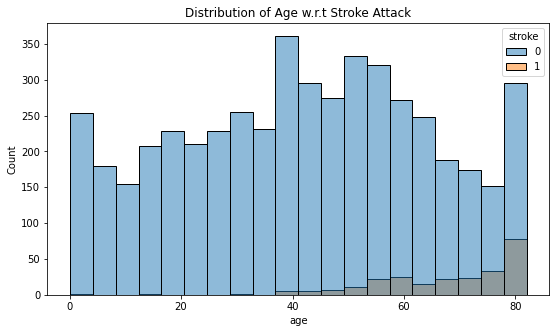

In [ ]:
ax = plt.figure(figsize = (9,5))
sns.histplot(
    data=df_dropped,
    x = "age",
    hue="stroke",
)
plt.title("Distribution of Age w.r.t Stroke Attack")
plt.show()

Comment:Here we are ploting age for stroke percentage among all the dates.

# Classification (15+15):
## Now choose two classification techniques.

## preparation 

*   create you text train set
*   create your classifier
*   feed the train set into the classifier
(you can take reference from our lab)



In [ ]:
features = ['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']   #Feature of my dataset

label = ['stroke'] # geting the target value

X = df_dropped[features] # we only take all the  features
y = df_dropped[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

## Comment: Getting the all features and target value from my dataset, then creating the training set for classification

In [ ]:

clf = tree.DecisionTreeClassifier() # creating classificaton from decision tree
clf = clf.fit(X_train, y_train ) # fitting the training set on decition tree
y_pred=clf.predict(X_test) # predict the test


In [ ]:


#model = KNeighborsClassifier(n_neighbors=2)
knn = KNeighborsClassifier(n_neighbors=2) # creating classificaton from Knn Classification
clf1 = knn.fit(X_train,y_train) # fitting the training set on Knn Classification
y_pred1=clf1.predict(X_test)  # predict the test




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Ref: Our knn Lab code used

# Model Evaluation (Accuracy) (15)

## Testing the models Accuracy
*   feed test train data into model to check accuracy
*   use confusion matrix for accuracy
*   print accuracy of the model

In [ ]:
print("Decition tree Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test,y_pred)),"\n")
print("Knn Classification Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test,y_pred1)),"\n")




Decition tree Accuracy:0.904 

Knn Classification Accuracy:0.953 



## Comment: Here we are printing accuracy of both KNN and DecesionTree Classifications.

Ref: Our knn Lab and decitson tree lab code used

In [ ]:
confusion_matrix( y_test,y_pred, labels=[1,0]) #confusion matrix for Decition tree

array([[  18,   68],
       [ 128, 1830]])

Source: Youtube Video,

In [ ]:

tn, fp, fn, tp=confusion_matrix( y_test,y_pred, labels=[1,0]).ravel()
accuracy=(tp+tn)/(tn+fp+fn+tp)

print("Desition tree confussion matrix accuracy : ", accuracy)

Desition tree confussion matrix accuracy :  0.9041095890410958


ref link for accuracy calculation : https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [ ]:
confusion_matrix( y_test,y_pred1, labels=[1,0]) #confusion matrix for Knn Classification

array([[   4,   82],
       [  14, 1944]])

In [ ]:

confusion_matrix( y_test,y_pred1, labels=[1,0])
tn1, fp1, fn1, tp1=confusion_matrix( y_test,y_pred1, labels=[1,0]).ravel()
accuracy1=(tp1+tn1)/(tn1+fp1+fn1+tp1)

print("Knn Classification confussion matrix accuracy : ", accuracy1)

Knn Classification confussion matrix accuracy :  0.9530332681017613
